# import necessary libraries.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [23]:
df = pd.read_csv(r'C:\Users\sony\Desktop\supermarket sales\supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### find shape

In [24]:
df.shape

(1000, 17)

### data information

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### statical summary

In [26]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### check duplicate values

In [27]:
df.duplicated().sum()

0

### finding null values

In [28]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### the distribution of ratings for the products

In [29]:
df['Rating'].value_counts()

Rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64

### how customers affect the average total sales and gross income

In [30]:
customer_sales = df.groupby('Customer type')[['Total', 'gross income']].mean()
customer_sales


,Total,gross income
Customer type,,
Member,327.791305,15.609110
Normal,318.122856,15.148707


### Which product line has the highest average unit price

In [31]:
average_unit_price = df.groupby('Product line')['Unit price'].mean()
average_unit_price

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

In [32]:
average_unit_price.max()

57.153651685393264

### # Calculate the correlation between quantity and unit price

In [33]:
correlation = df['Quantity'].corr(df['Unit price'])
correlation

0.010777564342497273

### Which city has the highest total sales and gross income

In [34]:
city_sales = df.groupby('City')[['Total', 'gross income']].sum()
city_sales

,Total,gross income
City,,
Mandalay,106197.6720,5057.0320
Naypyitaw,110568.7065,5265.1765
Yangon,106200.3705,5057.1605


### Are there any differences in the average total sales and gross income based on gender

In [35]:
averages_by_gender = df.groupby('Gender')[['Total', 'gross income']].mean()
averages_by_gender


,Total,gross income
Gender,,
Female,335.095659,15.956936
Male,310.789226,14.799487


## Exploratory data analysis

### avg unit price by product line

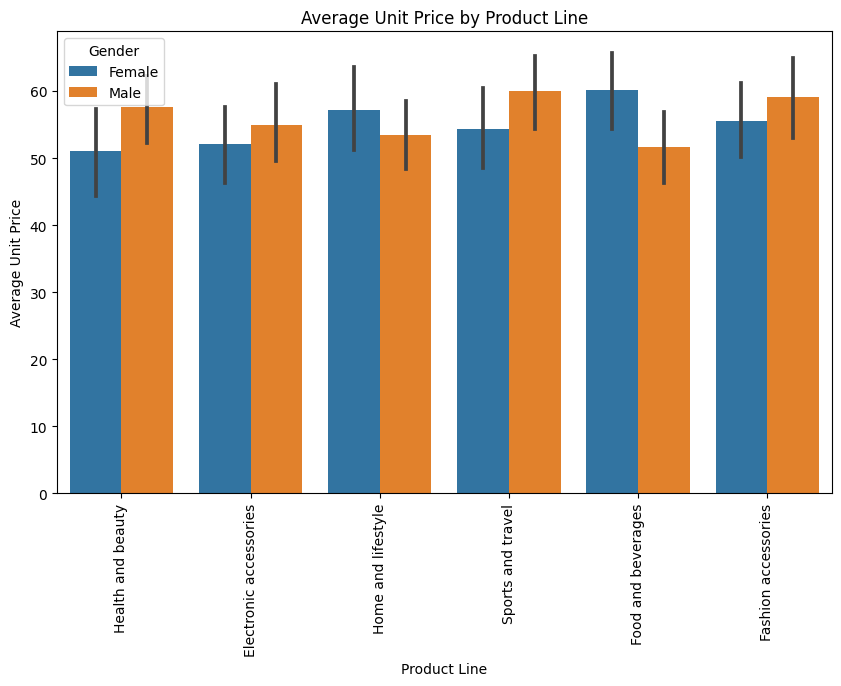

In [47]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Product line', y='Unit price', hue='Gender')
plt.xticks(rotation=90)
plt.title('Average Unit Price by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Unit Price')
plt.legend(title='Gender')
plt.show()

## Plotting the average total sales and gross income by gender

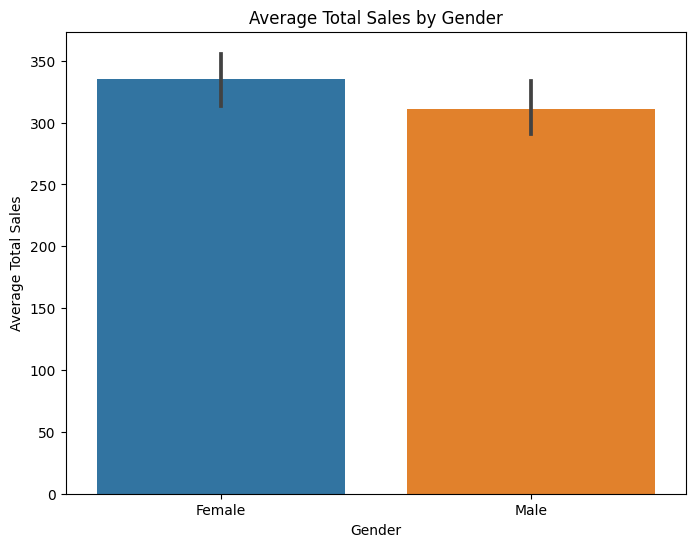

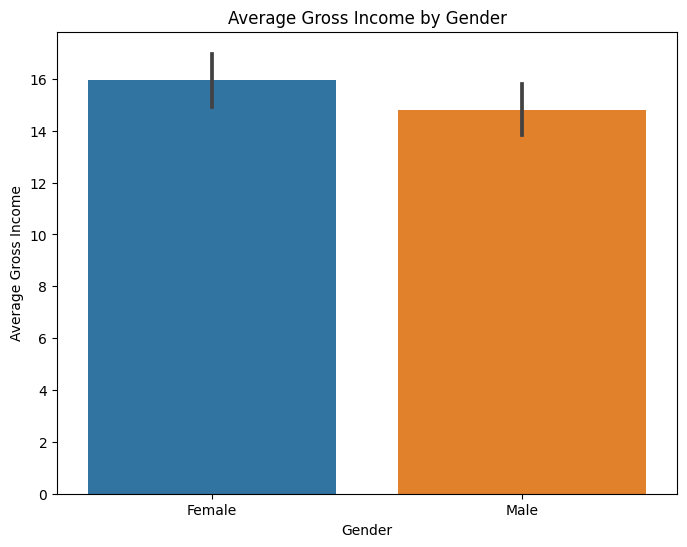

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Total')
plt.title('Average Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='gross income')
plt.title('Average Gross Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Gross Income')
plt.show()

### the distribution of sales across different months

### Convert 'Date' column to datetime format

In [49]:
df['Date'] = pd.to_datetime(df['Date'])

### Extract the month from the 'Date' column

In [50]:
df['Month'] = df['Date'].dt.month

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

## Create a countplot to visualize the distribution of sales across different months

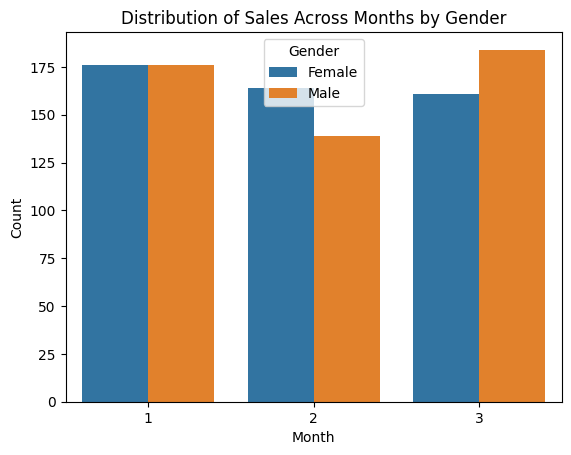

In [53]:
sns.countplot(data=df, x='Month', hue='Gender')
plt.title('Distribution of Sales Across Months by Gender')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### the distribution of the 5% tax amount across different product lines

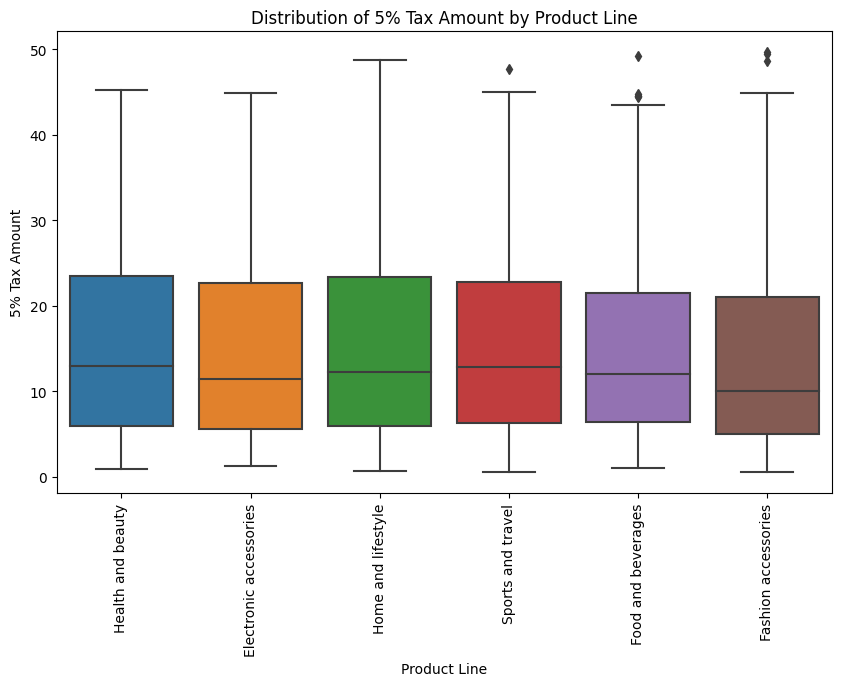

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product line', y='Tax 5%')
plt.xticks(rotation=90)
plt.title('Distribution of 5% Tax Amount by Product Line')
plt.xlabel('Product Line')
plt.ylabel('5% Tax Amount')
plt.show()
